## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [138]:
dataset = pd.read_csv('titanic.csv');

average_age = int(dataset['Age'].mean())
dataset['Age'] = dataset['Age'].fillna(average_age)

new_dataset = dataset[["Sex", "Survived"]]
male_total = new_dataset.value_counts('Sex').loc['male']
female_total = new_dataset.value_counts('Sex').loc['female']

survived = new_dataset[new_dataset["Survived"] == 1]

male_survived = survived.value_counts("Sex").loc["male"]
female_survived = survived.value_counts("Sex").loc["female"]

male_and_female = [round((female_survived / female_total) *100, 2), round((male_survived / male_total) * 100, 2) ]
print(f"Male survived - {male_and_female[1]}%")
print(f"Female survived - {male_and_female[0]}%")



Male survived - 18.89%
Female survived - 74.2%


**Задача 2:** Відтворіть ці графіки  
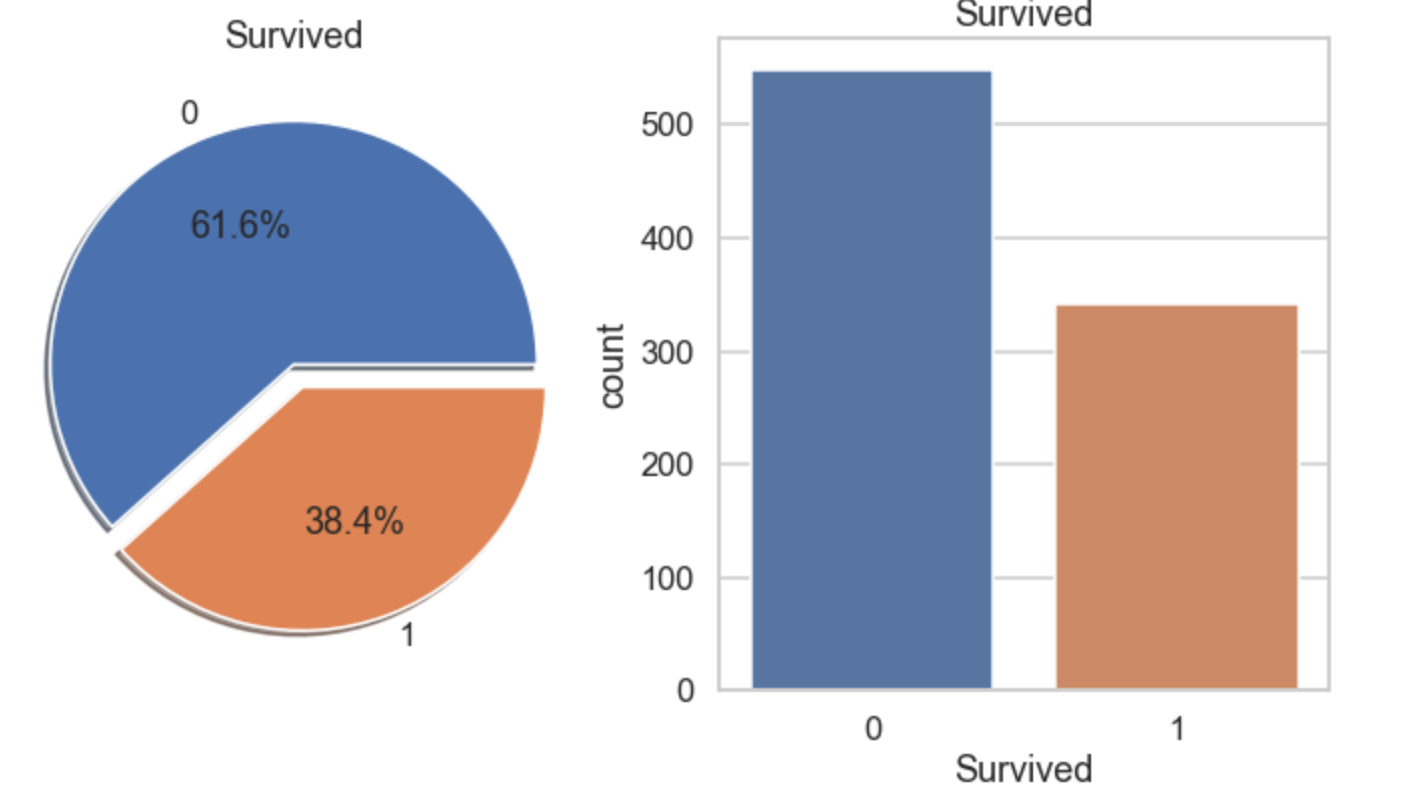


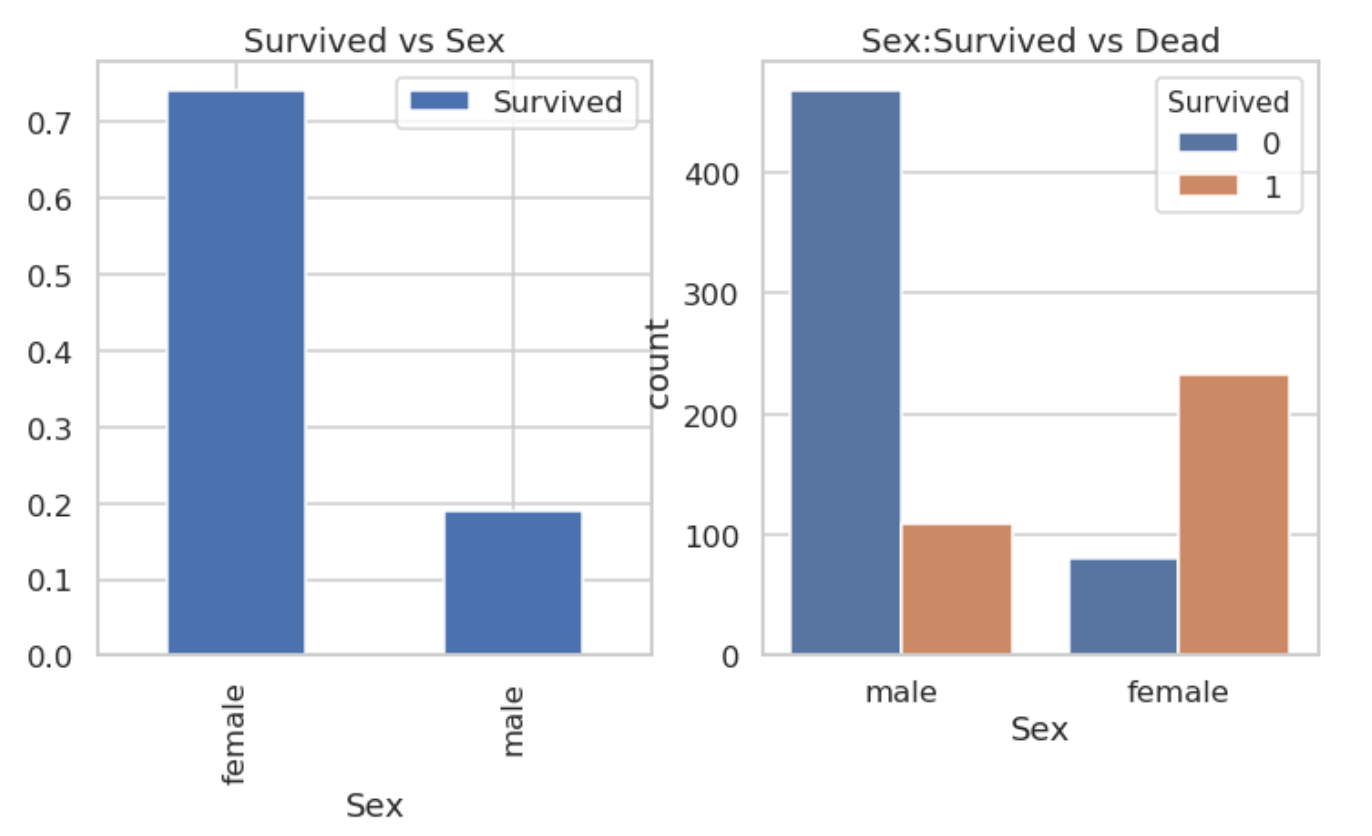

0.6812865497076024


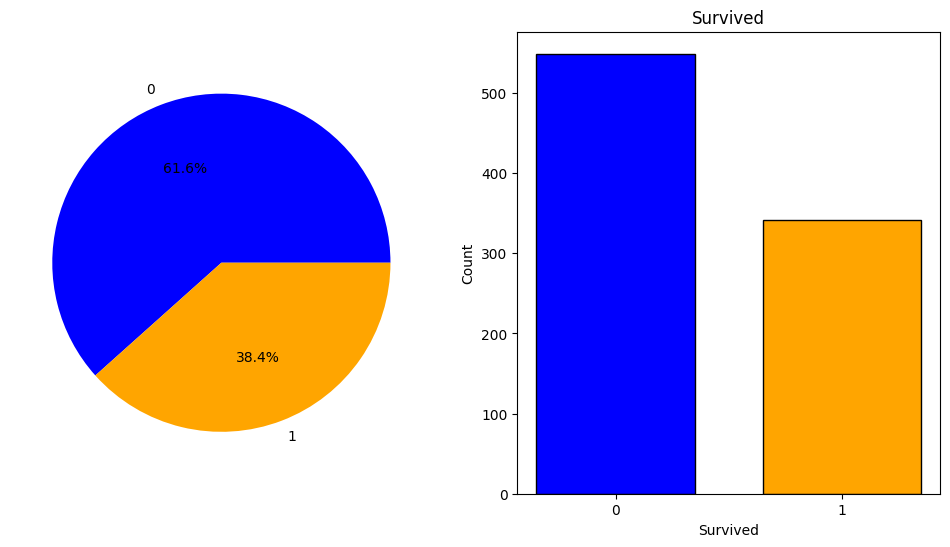

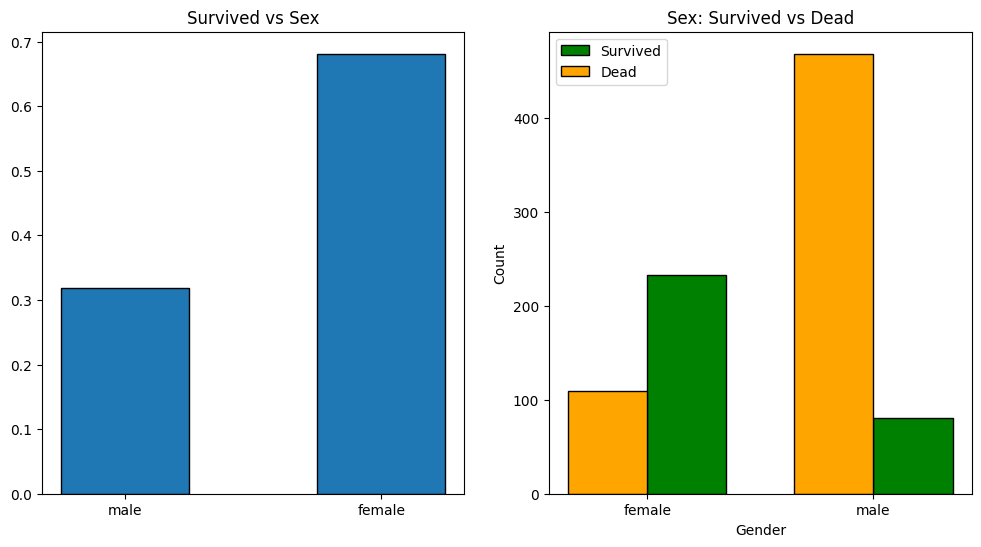

In [150]:

colors = ["blue", "orange"]
not_survived, survived = dataset['Survived'].value_counts()
total = dataset.shape[0]
not_survived_perc = not_survived / total * 100
survived_prec = survived / total * 100


#1
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie([not_survived_perc, survived_prec], colors=colors, labels=['0', '1'], autopct='%1.1f%%')

#2
plt.subplot(122)
plt.bar(['0','1'], [not_survived,survived], width=0.7, color=colors, edgecolor='black')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title("Survived")


#3
survived_general = dataset[dataset.Survived == 1]
male_female_survived = survived_general.Sex.value_counts()

male_in_persentage = male_female_survived.loc["male"] / (survived_general.shape[0])
female_in_persentage = male_female_survived.loc["female"] / (survived_general.shape[0])

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(['male', 'female'], [male_in_persentage, female_in_persentage] , width=0.5, edgecolor='black')
plt.title("Survived vs Sex")

#4

labels = ['female', 'male']
x = np.arange(len(labels))
dead = dataset[dataset['Survived'] == 0]
male_female_dead = dead.Sex.value_counts()
plt.subplot(122)
plt.bar(x+0.35, [male_female_survived.loc["female"], male_female_dead.loc["female"]], width=0.35, label='Survived', color='green', edgecolor='black')
plt.bar(x, [male_female_survived.loc["male"], male_female_dead.loc["male"]], width=0.35, label='Dead', color='orange' ,edgecolor='black')


plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Sex: Survived vs Dead')
plt.xticks(x + 0.35 / 2, labels)
plt.legend()


Прокоментуйте побудовані графіки
1) Перший графік показує відношення в відсотках людей які вижили та загинули. 38.4% - вижили, 61.6% загинули.
2) Другий графік показує відношення в цифрах кількість людей які загинули та вижили. 549 - загинули, 342 вижили
3) Третій графі показує відношення чоловіків та жінок які вижили. 68% - жінок вижило, 32% чоловіків вижило від загальної кількості людей.
4) Четвертий графік показує відношення чоловіків та жінок в цифрах які загинули та вижили. 109 чоловіків вижило/ 468 загинуло, 233 жінок вижило/ 81 загинула.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [37]:
initial_dataset = pd.read_csv('titanic.csv')
columns = initial_dataset.columns



for column in columns:
    count_of_not_nan = initial_dataset[initial_dataset[column].isna()][column].shape[0]
    print(f"{column} has {count_of_not_nan} nan values")

PassengerId has 0 nan values
Survived has 0 nan values
Pclass has 0 nan values
Name has 0 nan values
Sex has 0 nan values
Age has 177 nan values
SibSp has 0 nan values
Parch has 0 nan values
Ticket has 0 nan values
Fare has 0 nan values
Cabin has 687 nan values
Embarked has 2 nan values


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [151]:

female_names = dataset[dataset["Sex"] == 'female']["Name"]

for i, name in enumerate(female_names):
    if '(' in name:
        first_name = name.split('(')[1].split(' ')[0]
        female_names.iloc[i] = first_name
    else:
        splitted_name = name.split(',')
        names = splitted_name[1]
        first_name = names.split(' ')[2]
        female_names.iloc[i] = first_name

most_popular_name = female_names.value_counts().head(1)

print(f"Найпопулярніше жіноче ім'я є {most_popular_name.index[0]} з частотою {most_popular_name[0]} повторень")




Найпопулярніше жіноче ім'я є Anna з частотою 14 повторень


C:\Users\asus\AppData\Local\Temp\ipykernel_18972\3942816205.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_names.iloc[i] = first_name
C:\Users\asus\AppData\Local\Temp\ipykernel_18972\3942816205.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_names.iloc[i] = first_name
C:\Users\asus\AppData\Local\Temp\ipykernel_18972\3942816205.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Найпопулярніше жіноче ім

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [153]:

male_names = dataset[dataset["Sex"] == 'male']["Name"]

first_name = male_names.str.split(',').str[1].str.split(' ').str[2]

most_popular_name = first_name.value_counts()
print(f"Найпопулярніше чоловіче ім'я {most_popular_name.index[0]} з частотою {most_popular_name[0]} повторень")

Найпопулярніше чоловіче ім'я William з частотою 35 повторень


C:\Users\asus\AppData\Local\Temp\ipykernel_18972\606775000.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Найпопулярніше чоловіче ім'я {most_popular_name.index[0]} з частотою {most_popular_name[0]} повторень")


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
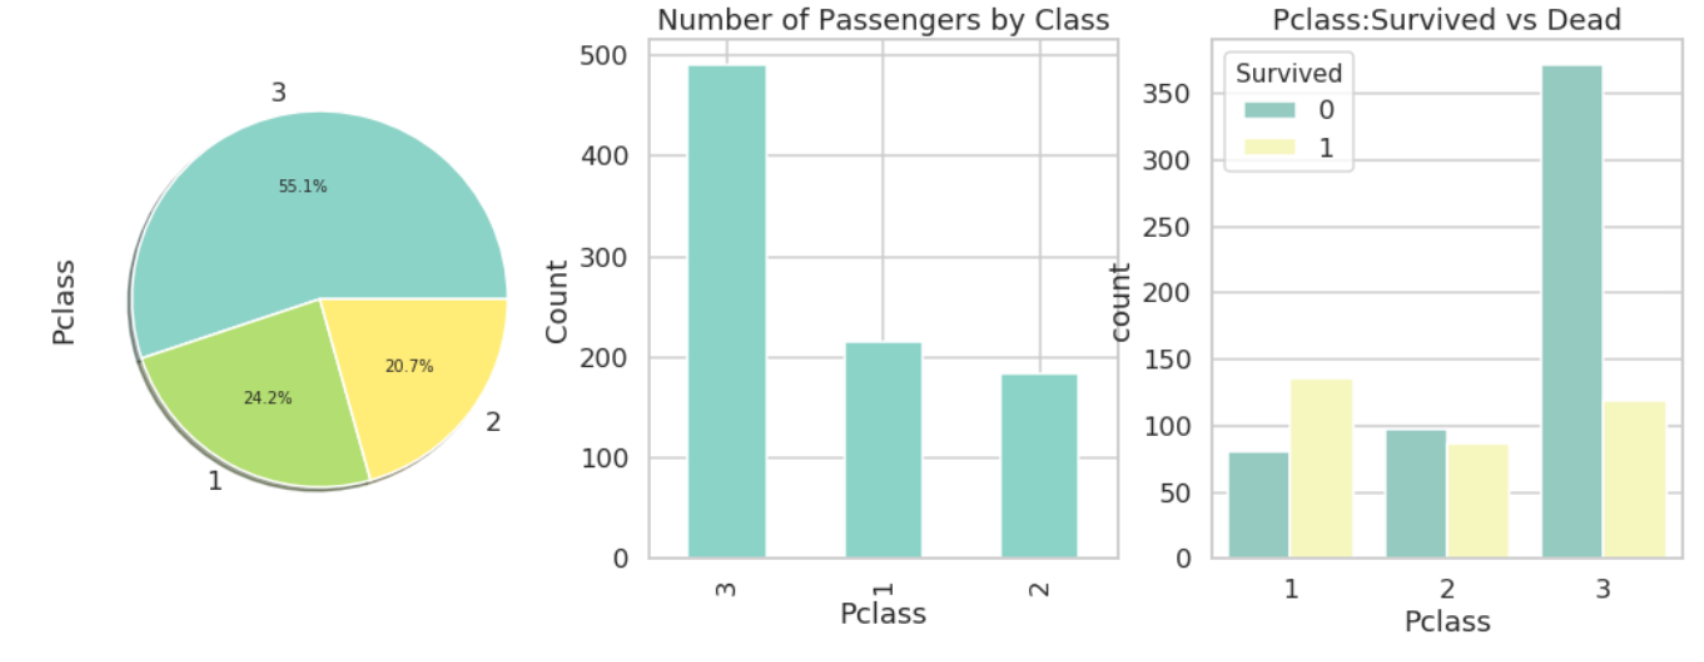

Text(0.5, 0, 'Pclass')

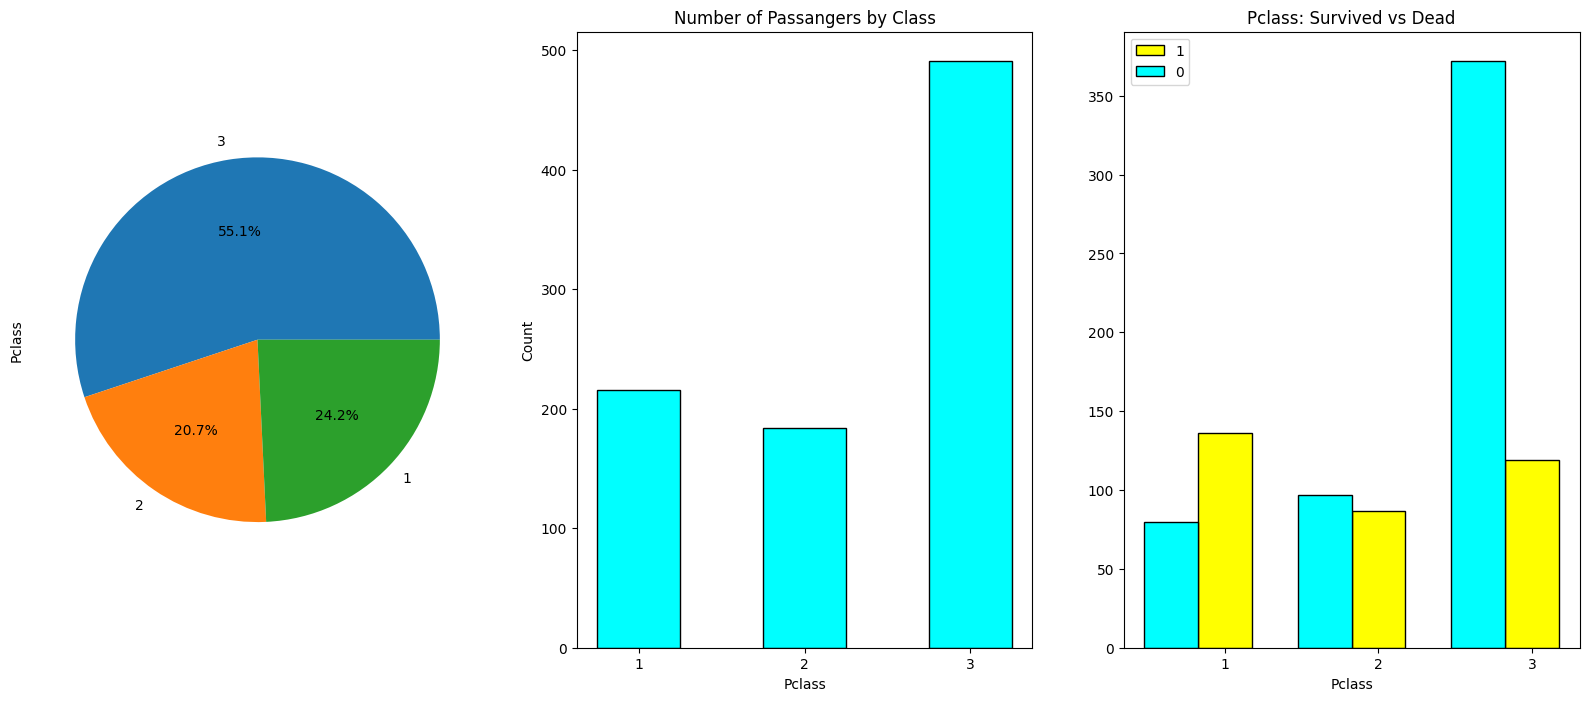

In [164]:


pclasses = dataset["Pclass"].value_counts().sort_index(ascending = False)
survived_count_by_class = dataset[dataset["Survived"] == 1].value_counts("Pclass").sort_index()
not_survived_count_by_class = dataset[dataset["Survived"] == 0].value_counts("Pclass").sort_index()


plt.figure(figsize=(20, 8))

#1
plt.subplot(131)
plt.ylabel("Pclass")
plt.pie(pclasses, autopct='%1.1f%%', labels = pclasses.index)

#2
plt.subplot(132)
plt.bar(pclasses.index,  pclasses.values , width=0.5, color='cyan', edgecolor='black')
plt.xticks(range(1, len(pclasses.values)+1))
plt.title("Number of Passangers by Class")
plt.ylabel("Count")
plt.xlabel("Pclass")

#3
index = range(len(not_survived_count_by_class))

bar_width = 0.35
plt.subplot(133)
plt.bar([i + bar_width /2  for i in index], survived_count_by_class.values, width=bar_width, color = 'yellow', label="1", edgecolor='black')
plt.bar([i - bar_width/2  for i in index], not_survived_count_by_class.values, width=bar_width, color = 'cyan', label="0", edgecolor='black')
plt.xticks([i + bar_width / 2 for i in index], survived_count_by_class.index)
plt.legend(loc='upper left')
plt.title("Pclass: Survived vs Dead")
plt.xlabel("Pclass")





Прокоментуйте побудовані графіки
1) Графік №1 містить відношення кількостів пасажирі різних класів в відстоках. 55.1% - третій клас, 20.7% - другий клас, 24.2% перший клас.
2) Графік №2 містить відношення кількостів пасажирів різних класів в цифрах. 491 особа - третій клас, 184 - другий клс, 216 - перший клас.
3) Графік №3 містить відношення кількості пасажирів різних класів які загинули та вижили.
Третій клас:
    119 вижило / 372 загинуло
Другий клас:
    87 вижило / 97 загинуло
Перший клас:
    136 вижило / 80 загинуло

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
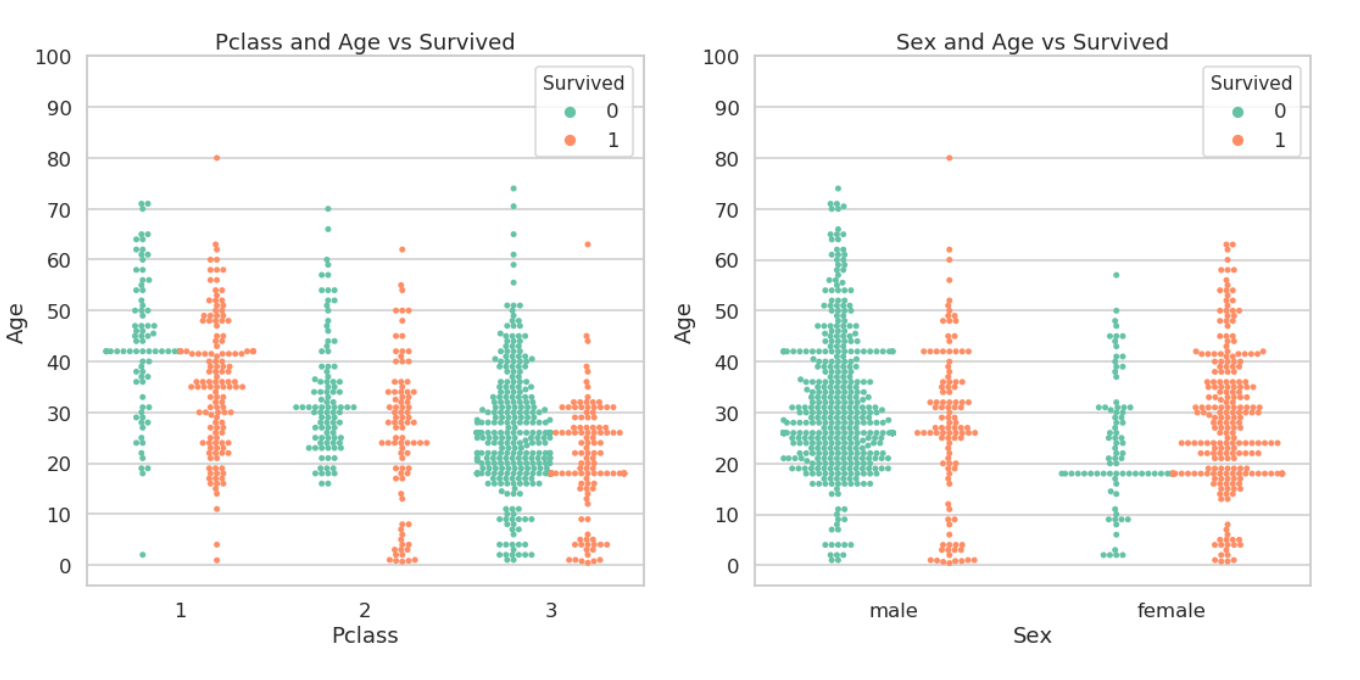![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 21.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, Us

<Axes: title={'center': 'Sex and age vs Survived'}, xlabel='Sex', ylabel='Age'>

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


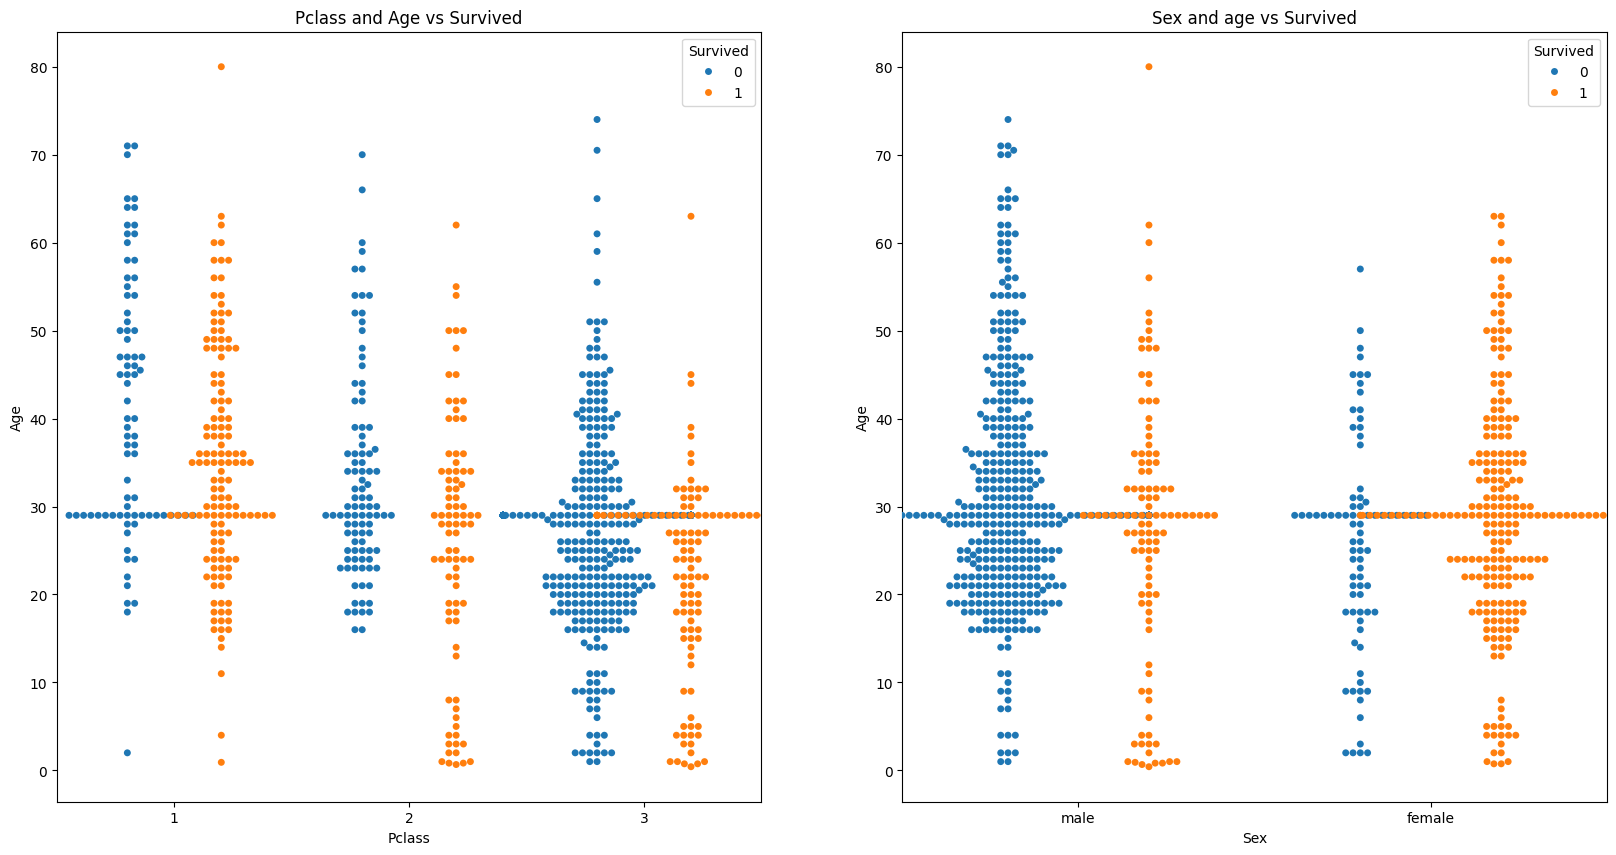

In [162]:


shorten_dataset_class = dataset[["Age", "Survived","Pclass"]]
shorten_dataset_sex = dataset[["Sex", "Survived","Age"]]

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title("Pclass and Age vs Survived")
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=shorten_dataset_class, dodge=True, edgecolor='black')

plt.subplot(122)
plt.title('Sex and age vs Survived')
sns.swarmplot(x='Sex', y='Age', hue='Survived', data=shorten_dataset_sex, dodge=True, edgecolor='black')



1) Графік Pclass and Age vs Survived показує відношення кількості людей що належать до певного класу та мають певний вік, які загинули та вижили.
На цьому графіку видно що найбільша кількість виживших належить до 1-го класу, а найбльша кількість загинувших знаходиться в 3-му класу.

2) Графік Sex and Age vs Survived показує відношення кількості людей що належать до певної статі та які мають певний вік, які загинули та вижили.
На цьому графіку видно, що найбльша кільксть виживших є серед жінок, вік яких знаходиться в межах 15 - 55 років +-. а найбільша кількість загиблих серед чоловіків віком 15 - 65 років +-.


**Задача 8** Побудуйте наступні діаграми розподілів:  

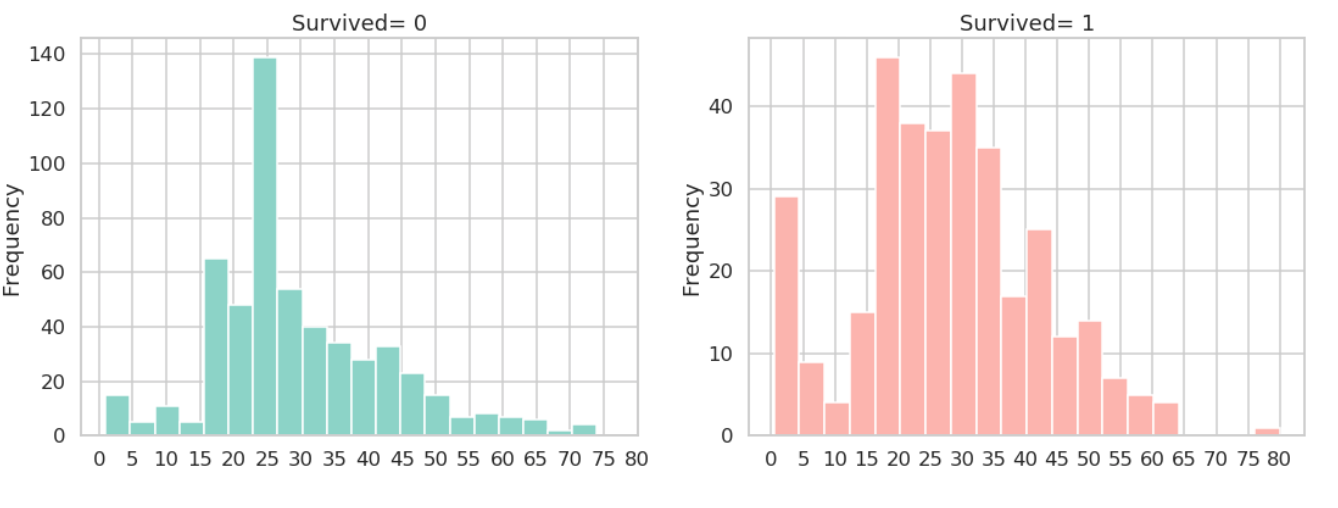



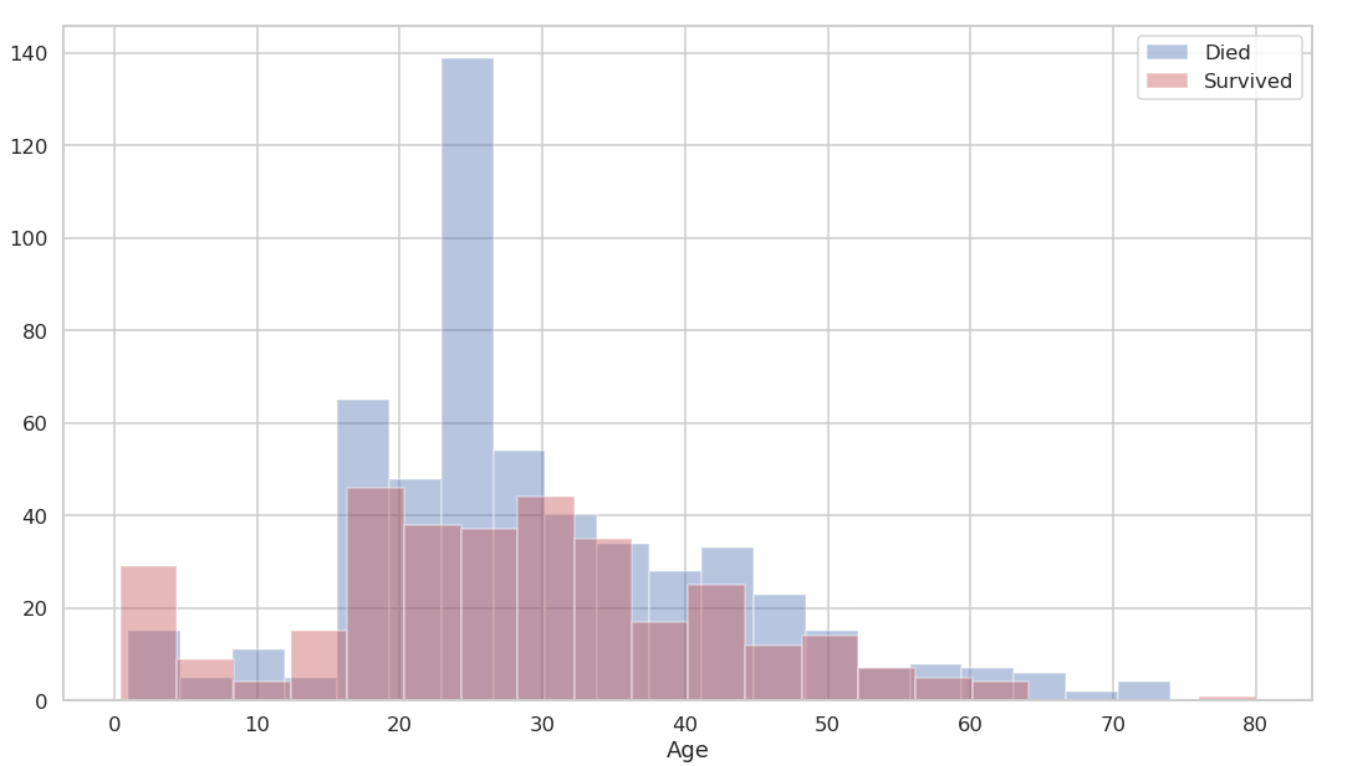

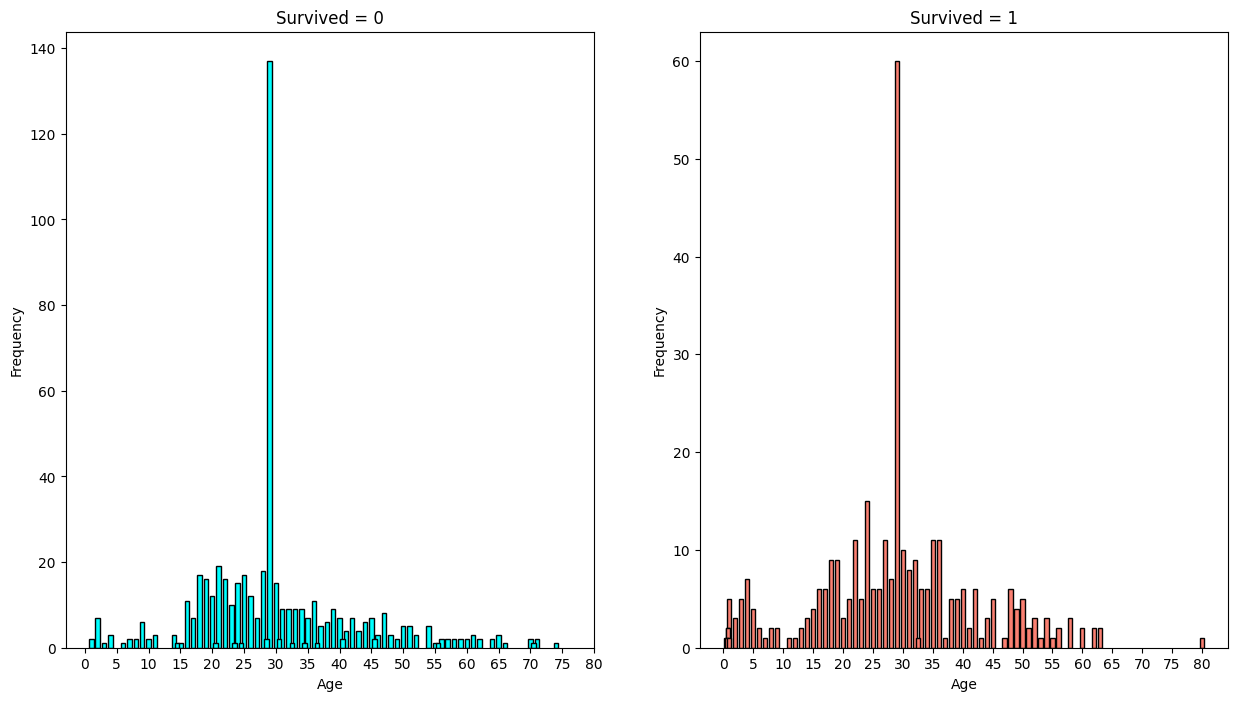

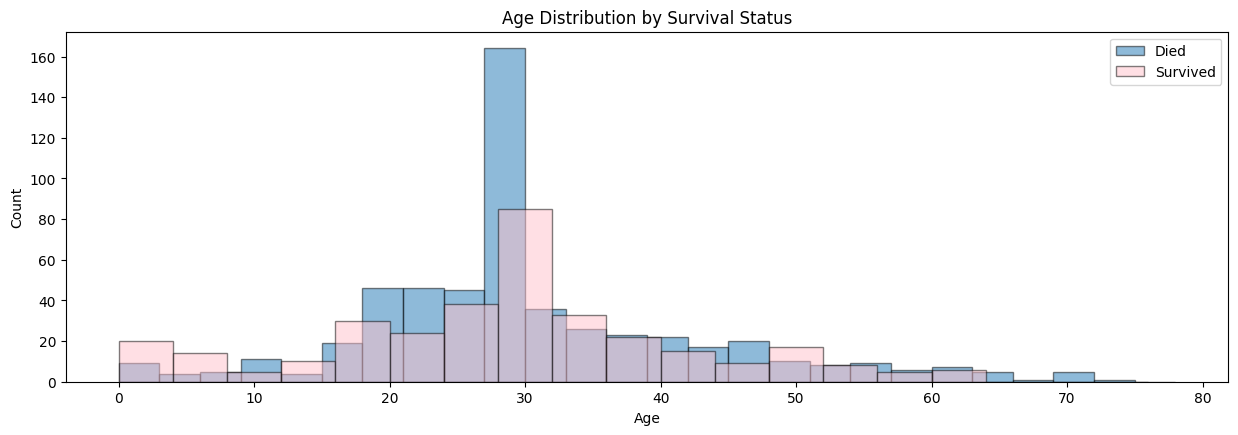

In [161]:

filtered_dataset_dead = dataset[dataset["Survived"] == 0]
filtered_dataset_survived = dataset[dataset["Survived"] == 1]


max_age = int(max(dataset['Age']))

age_frequency_dead = filtered_dataset_dead['Age'].value_counts()
age_frequency_survived = filtered_dataset_survived['Age'].value_counts()

#1
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.bar(age_frequency_dead.index, age_frequency_dead.values, width=0.7, color='cyan', edgecolor='black')
plt.xticks(range(0, max_age + 1, 5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survived = 0')

#2
plt.subplot(122)
plt.bar(age_frequency_survived.index, age_frequency_survived.values, width=0.7, color='salmon', edgecolor='black')
plt.xticks(range(0, max_age + 1, 5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survived = 1')


#3
plt.figure(figsize=(15, 10))
plt.subplot(211)

plt.hist(filtered_dataset_dead.Age, bins=range(0, max_age, 3), alpha=0.5, label='Died', edgecolor='black')
plt.hist(filtered_dataset_survived.Age, bins=range(0, max_age, 4), alpha=0.5, label='Survived', color='pink', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Survival Status')
plt.legend()





Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?
Зображення показує дві гістограми розподілу віку пасажирів Титаніка, розділених на тих, хто не вижив (Survived = 0) та тих, хто вижив (Survived = 1).



Судячи з гістограм найбільша кількість невиживших пасажирів була у віковій групі близько 20-30 років.
Розподіл віку виживших є більш рівномірним, з вищою частотою виживання в віковій групі від 20 до 40 років.
У обох групах менше виживали наймолодші та найстарші пасажири, але це менш виражено серед виживших.

Для глибшого аналізу та зроблення  висновків щодо розподілів не достатньо лише візуалізації. Потрібео виконати числові обчислення на перевірку гіпотези про розподіли.



**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
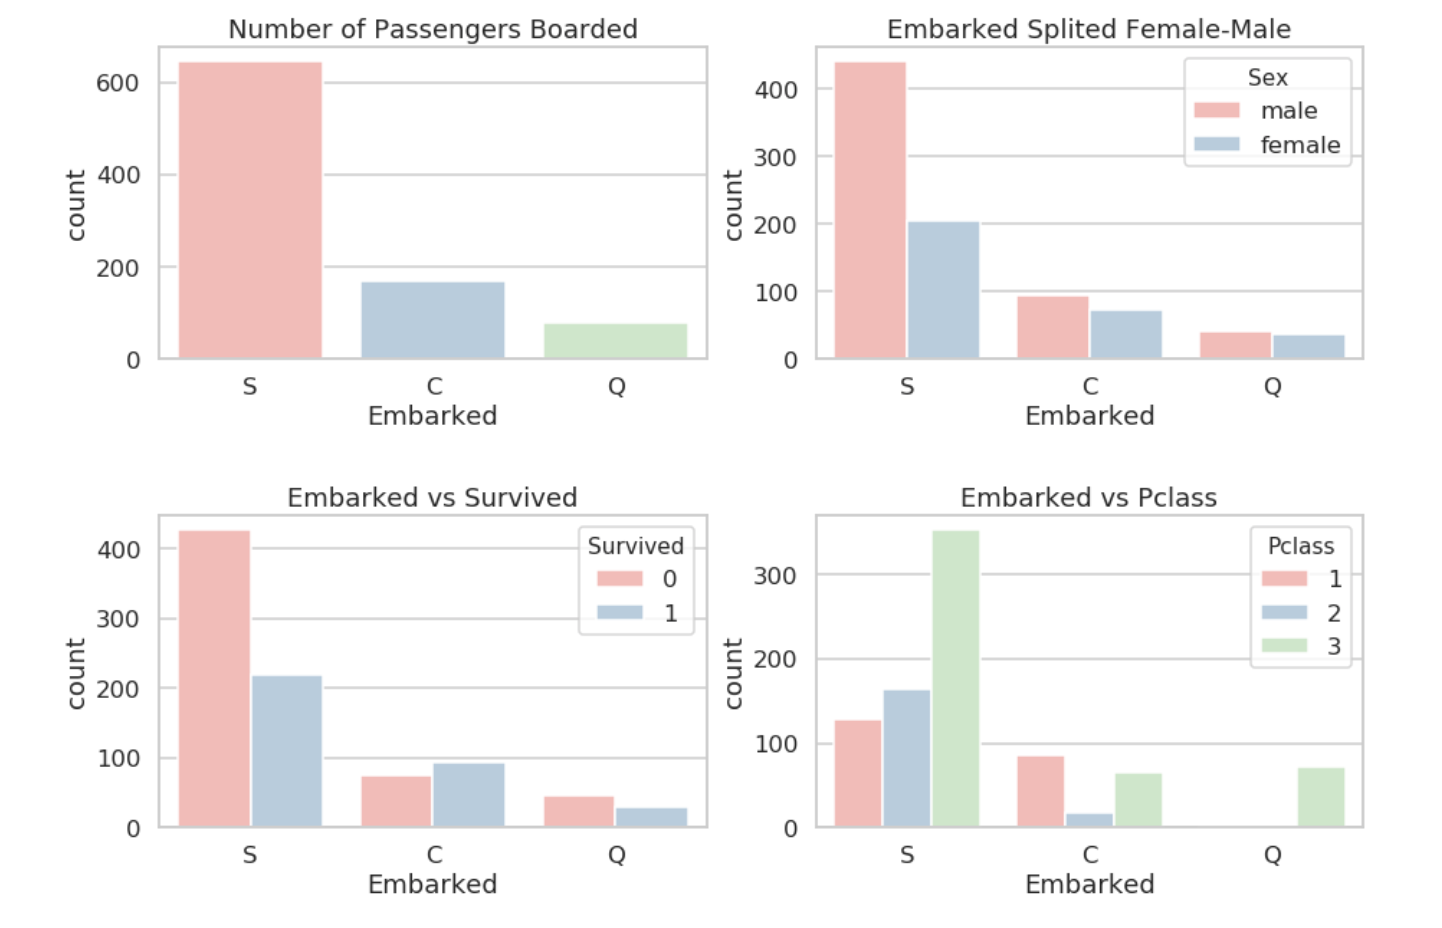

Text(0.5, 1.0, 'Embarked vs Pclass')

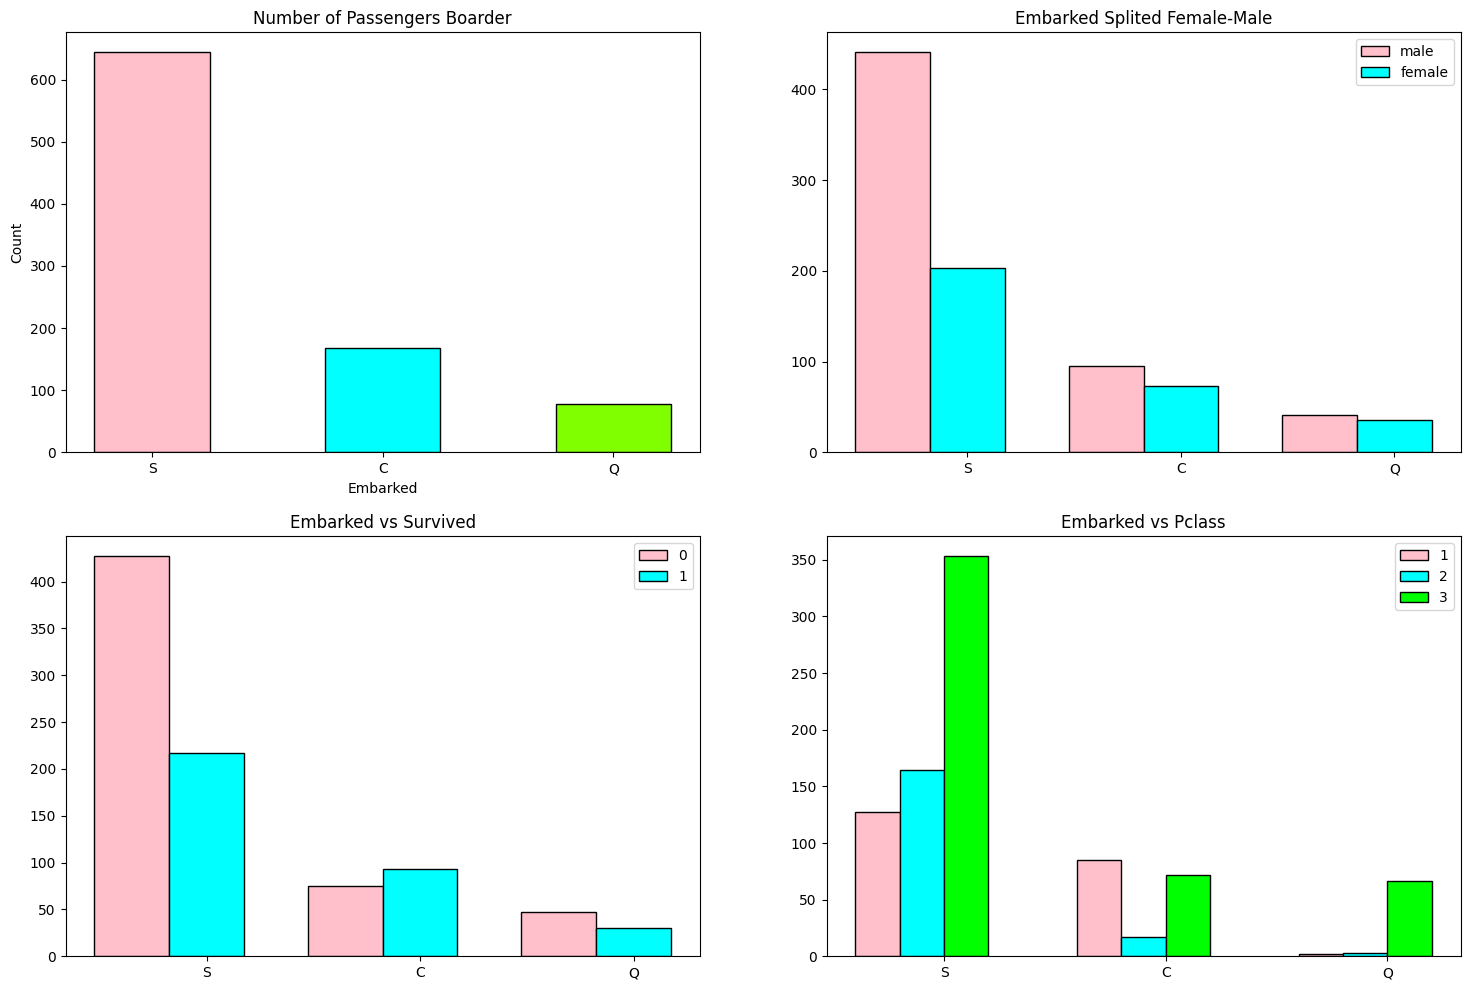

In [160]:

passenger_by_embarked = dataset['Embarked'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18, 12))

#1
plt.subplot(221)
plt.bar(passenger_by_embarked.index, passenger_by_embarked.values, width=0.5, color = ['pink', 'cyan', 'chartreuse'], edgecolor='black')
plt.title("Number of Passengers Boarder")
plt.xlabel("Embarked")
plt.ylabel("Count")


#2
embarked_by_male = dataset[dataset['Sex'] == 'male']['Embarked'].value_counts().sort_values(ascending=False)
embarked_by_female= dataset[dataset['Sex'] == 'female']['Embarked'].value_counts().sort_values(ascending=False)
index = range(len(embarked_by_male))

bar_width = 0.35
plt.subplot(222)
plt.bar([i - bar_width / 2  for i in index], embarked_by_male.values, width=bar_width, color = 'pink', label="male", edgecolor='black')
plt.bar([i +bar_width / 2  for i in index], embarked_by_female.values, width=bar_width, color = 'cyan', label="female", edgecolor='black')
plt.xticks([i + bar_width / 2 for i in index], embarked_by_male.index)
plt.legend(loc='upper right')
plt.title("Embarked Splited Female-Male")

#3
embarked_survived = dataset[dataset['Survived'] == 1]['Embarked'].value_counts().sort_values(ascending=False)
embarked_not_survived= dataset[dataset['Survived'] == 0]['Embarked'].value_counts().sort_values(ascending=False)

index = range(len(embarked_survived))
plt.subplot(223)

plt.bar([i - bar_width / 2  for i in index], embarked_not_survived.values, width=bar_width, color = 'pink', label="0", edgecolor='black')
plt.bar([i + bar_width / 2  for i in index], embarked_survived.values, width=bar_width, color = 'cyan', label="1", edgecolor='black')
plt.xticks([i + bar_width / 2 for i in index], embarked_survived.index)
plt.legend(loc='upper right')
plt.title("Embarked vs Survived")

#4
bar_width = 0.2
embarked_by_pclass_1 = dataset[dataset['Pclass'] == 1]['Embarked'].value_counts().sort_values(ascending=False)
embarked_by_pclass_2 = dataset[dataset['Pclass'] == 2]['Embarked'].value_counts().sort_values(ascending=False)
embarked_by_pclass_3 = dataset[dataset['Pclass'] == 3]['Embarked'].value_counts().sort_values(ascending=False)

index = range(len(embarked_by_pclass_1))
plt.subplot(224)

plt.bar([i - bar_width for i in index], embarked_by_pclass_1, width=bar_width, color='pink', label="1", edgecolor='black')
plt.bar(index, embarked_by_pclass_2, width=bar_width, color='cyan', label="2", edgecolor='black')
plt.bar([i + bar_width for i in index], embarked_by_pclass_3, width=bar_width, color='lime', label="3", edgecolor='black')
plt.xticks([i + bar_width / 2 for i in index], embarked_by_pclass_1.index)

plt.legend(loc='upper right')
plt.title("Embarked vs Pclass")



Аналітика шансів виживання серед пасажирів:
На основі побудованих діаграм можна зробити висновок, що 
в Southampton (S) сіло найбільше пасажирів третього класу , що значно перевищує кількість пасажирів першого та другого  класів.
в Cherbourg (C) також сіло більше пасажирів першого класу, ніж інших класів.
в Queenstown (Q) переважна більшість пасажирів були третього класу.

З цих даних можна зробити висновок, що пасажири, які були  в першому класі, мали кращі шанси на виживання порівняно з пасажирами з інших портів і класів. Це може бути пов'язано з соціально-економічним статусом, оскільки пасажири першого класу, як правило, були більш заможними і могли мати кращий доступ до рятувальних човнів. З іншого боку, велика кількість пасажирів третього класу, особливо з Southampton, могла вказувати на менші шанси на виживання, що може бути пов'язано з обмеженнями доступу до рятувальних човнів і гіршим розташуванням кают в кораблі.

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

Text(0, 0.5, 'Frequency')

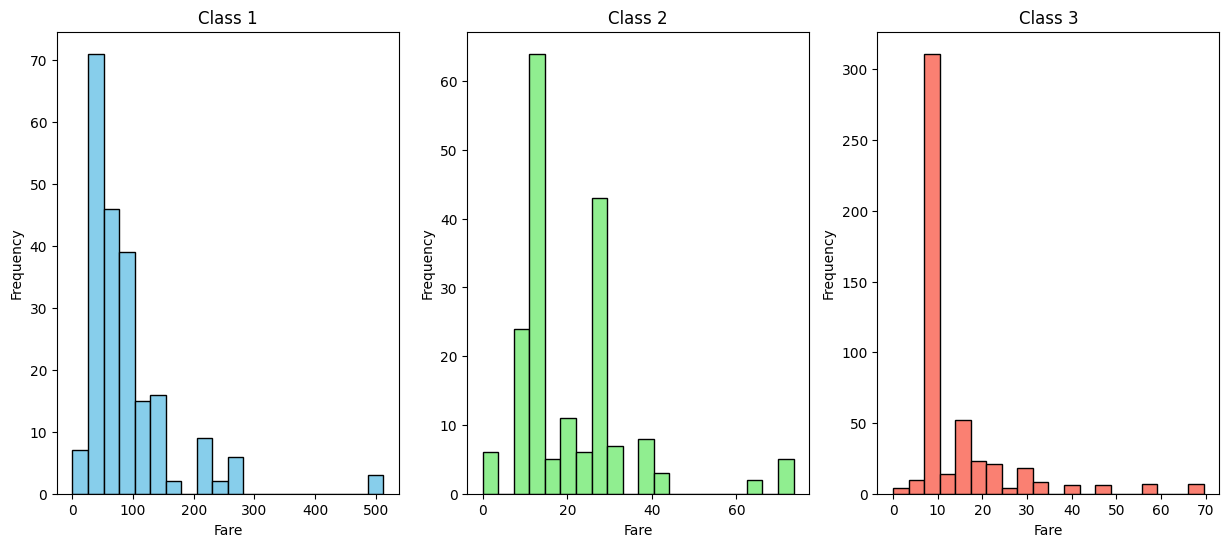

In [159]:


class_1 = dataset[dataset['Pclass'] == 1]
class_2 = dataset[dataset['Pclass'] == 2]
class_3 = dataset[dataset['Pclass'] == 3]

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(class_1['Fare'], bins=20, color='skyblue', edgecolor='black')
plt.title('Class 1')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(class_2['Fare'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Class 2')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(class_3['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Class 3')
plt.xlabel('Fare')
plt.ylabel('Frequency')



Прокоментуйте побудовані графіки
1) Перший графік містить розподіл вартості квитка до першого класу. На ньому видно, що вартість найдорощого квитка була 500 доларів, а найбальша кількість квитків була куплена з вартістю 70 доларів.

2) Другий графік містить розподіл вартості квитка до другого класу. На ньому видно, що вартість найдорощого квитка була в районі 70-80 доларів, а найбальша кількість квитків була куплена з вартістю 70 доларів +-. 

3) Третій графік містить розподіл вартості квитка до третього класу. На ньому видно, що вартість найдорощого квитка була в районі 70 доларів, а найбальша кількість квитків була куплена  доларів з вартістю 8-10 доларів, в кількості понад 300 одиниць. 